## Imersão de Dados - Alura

### Apresentação

#### Autores
1.   [Grupo Alura](https://www.alura.com.br) - A maior plataforma brasileira de cursos de tecnologia.
2.   [Lucas Araújo](https://www.linkedin.com/in/lucasaraujo0255/) - Entusiasta de Data Science e cursando Ciências da Computação

### Resumo

Este documento tem o objetivo apresentar um estudo de Data Science oferecido na semana de Imersão de Dados da Alura (https://www.alura.com.br): uma análise exploratória sobre o Exame Nacional do Ensino Médio - o ENEM - na sua edição do ano de 2019 e criação de um modelo de Machine Learning utilizando o Python e as principais bibliotecas na área de Data Science.

### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados, além de API´s e outras bibliotecas que serão apresentadas no decorrer do documento.

Os dados foram disponibilizados pela Alura e contém cerca de 128 mil registros de inscrições de alunos que realizaram as provas do ENEM 2019.

Clique [Aqui](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true.) para acessar os dados

#### Desafios - Dia 05:

**1**: Pesquisar sobre intervalo de confiança

**2**: Testar com outros parâmetros a árvore de decisão

**3**: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

**4**: Pesquisar oque é o problema de underfit

**5**: Plotar um gráfico com test_score e train_test

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [3]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

In [4]:
df["NU_NOTA_TOTAL"] = df[provas].sum(axis = 1)

In [5]:
df_sem_zero = df.query("NU_NOTA_TOTAL != 0")
df_sem_zero = df_sem_zero[provas].dropna()

## [Aula 05](https://www.alura.com.br/imersao-dados/aula05-cross-validation-ml) - Validação de modelo e Overfit

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [7]:
provas_X = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
provas_y = "NU_NOTA_MT"

X = df_sem_zero[provas_X]
y = df_sem_zero[provas_y]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

###### Máquinas de vetores de suporte

In [9]:
SVR = LinearSVR(random_state = 1)
SVR.fit(X_train, y_train)
previsao_MT = SVR.predict(X_test)
mean_squared_error(y_test, previsao_MT)

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


23137.66303154942

###### Decision Tree

In [10]:
DT = DecisionTreeRegressor(max_depth=3)
DT.fit(X_train, y_train)
previsao_DT_MT = DT.predict(X_test)

In [11]:
mean_squared_error(y_test, previsao_DT_MT)

5949.395274908381

###### Cross validation

In [12]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = True)
DT = DecisionTreeRegressor(max_depth=10)
resultados = cross_validate(DT, X, y, cv = cv, scoring = "neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5436.11925181106 - 6013.03024857916


In [14]:
def regressor_arvore(nivel):
    cv = KFold(n_splits = 10, shuffle = True)
    DT = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(DT, X, y, cv = cv, scoring = "neg_mean_squared_error", return_train_score= True)
    print(f"Treino {nivel} = {(resultados['train_score'] * -1).mean()} | Teste {nivel} = {(resultados['test_score'] * -1).mean()}")

In [15]:
for i in range(1, 15):
    regressor_arvore(i)

Treino 1 = 7844.977682037682 | Teste 1 = 7857.681065401962
Treino 2 = 6527.955856469487 | Teste 2 = 6551.719298628917
Treino 3 = 6021.460919388852 | Teste 3 = 6054.064336775983
Treino 4 = 5762.073528372823 | Teste 4 = 5813.761080062517
Treino 5 = 5599.902200552315 | Teste 5 = 5679.975668701548
Treino 6 = 5470.965239179399 | Teste 6 = 5590.47323992963
Treino 7 = 5367.067366789544 | Teste 7 = 5543.60134020064
Treino 8 = 5277.008303984179 | Teste 8 = 5531.53220703772
Treino 9 = 5165.674714355762 | Teste 9 = 5601.767433767646
Treino 10 = 5023.291582484358 | Teste 10 = 5733.337600118148
Treino 11 = 4835.990930633766 | Teste 11 = 5922.631022908788
Treino 12 = 4598.922978320159 | Teste 12 = 6193.10595040599
Treino 13 = 4316.594586941543 | Teste 13 = 6478.389856833477
Treino 14 = 4008.684982251782 | Teste 14 = 6826.161515288966


###### Desafio 01 - Pesquisar sobre intervalo de confiança

* Um intervalo de confiança (IC) é um intervalo estimado de um parâmetro de interesse de uma população. Em vez de estimar o parâmetro por um único valor, é dado um intervalo de estimativas prováveis.

* Intervalos de confiança são usados para indicar a confiabilidade de uma estimativa. Por exemplo, um IC pode ser usado para descrever o quanto os resultados de uma pesquisa são confiáveis. Sendo todas as estimativas iguais, uma pesquisa que resulte num IC pequeno é mais confiável do que uma que resulte num IC maior.

* O intervalo de confiança é importante para indicar a margem de incerteza (ou imprecisão) frente a um cálculo efetuado. Esse cálculo usa a amostra do estudo para estimar o tamanho real do resultado na população de origem.

As referências bibliográficas se encontram [aqui](http://www.portalaction.com.br/inferencia/intervalo-de-confianca)

###### Desafio 02 - Testar com outros parâmetros a árvore de decisão

In [16]:
def DTR(nivel, num_folhas):
    cv = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel, min_samples_leaf=num_folhas)
    resultados = cross_validate(modelo_arvore, X, y, cv= cv, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino Profundidade {nivel} e nº Folhas {num_folhas} = {(resultados['train_score']*-1).mean()} | Teste Profundidade {nivel} e Folhas {num_folhas} = {(resultados['test_score']*-1).mean()}\n\n")

In [17]:
for i in range(1, 11):
    for j in range(1, 6):
        DTR(i, j)

Treino Profundidade 1 e nº Folhas 1 = 7844.695055430282 | Teste Profundidade 1 e Folhas 1 = 7863.808351280883


Treino Profundidade 1 e nº Folhas 2 = 7844.714309544045 | Teste Profundidade 1 e Folhas 2 = 7863.785610956696


Treino Profundidade 1 e nº Folhas 3 = 7844.638200457086 | Teste Profundidade 1 e Folhas 3 = 7863.0789065195495


Treino Profundidade 1 e nº Folhas 4 = 7845.053089134613 | Teste Profundidade 1 e Folhas 4 = 7860.612404437792


Treino Profundidade 1 e nº Folhas 5 = 7844.97870524522 | Teste Profundidade 1 e Folhas 5 = 7865.016741382281


Treino Profundidade 2 e nº Folhas 1 = 6528.284646627389 | Teste Profundidade 2 e Folhas 1 = 6552.5280956683155


Treino Profundidade 2 e nº Folhas 2 = 6527.953892562085 | Teste Profundidade 2 e Folhas 2 = 6558.384081994833


Treino Profundidade 2 e nº Folhas 3 = 6528.41172529818 | Teste Profundidade 2 e Folhas 3 = 6552.154075125317


Treino Profundidade 2 e nº Folhas 4 = 6528.101744684726 | Teste Profundidade 2 e Folhas 4 = 6554.7434374

* Após realizar os testes, os resultados são parecidos com os obtidos na Aula 05: até um nível de profundidade máxima igual a 8, a árvore apresenta boa relação entre o score de treino e de teste, ou seja, não temos overfitting nem underfitting.

* O número de folhas impacta pouco nesses casos, mas contribui para diminuir um pouco o erro obtido nos testes. Para um número grande de profundidade, nos quais começa a ocorrer overfitting, o número de folhas consegue em alguns casos impactar o erro do teste, aproximando ele um pouco mais do erro obtido no treinamento.

* Entretanto, nos casos citados anteriormente isso não resolve o problema, pois o overfitting ainda ocorre, mesmo sendo minimizado. Mesmo assim, é interessante notar que o número de folhas pode diminuir esses efeitos dependendo da situação.

###### Desafio 03 - Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

Para isso, utilizaremos a função [GridSearchSV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), a sua funcionalidade é gerar candidatos a partir de uma grid de parâmetros que são passados pelo **param_grid**

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
DTR = DecisionTreeRegressor()
# Os parâmetros que iremos analisar serão a profundidade, e o número mínino de folhas
param_grid = {'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 4]}

# para isso, iremos buscar os melhores parametros a partir do dicionário 'param_grid'
resultados = GridSearchCV(DTR, param_grid, cv=10)

# Agora iremos usar os melhores parâmetros encontrados na Validação cruzada
resultados2 = cross_validate(resultados, X, y, cv= cv, scoring="neg_mean_squared_error", return_train_score=True)

In [20]:
print(f"Treino= {(resultados2['train_score']*-1).mean()} | Teste = {(resultados2['test_score']*-1).mean()}")

Treino= 6020.934794985866 | Teste = 6060.49219356168


###### Desafio 04 - Pesquisar oque é o problema de underfitting

* Underfitting é uma tradução para o inglês de sub-ajustado. Ou seja, nosso modelo não conseguiu aprender suficiente sobre os dados. O underfitting leva à um erro elevado tanto nos dados de treino quando nos dados de teste.
* Neste cenário o desempenho do modelo já é ruim no próprio treinamento. O modelo não consegue encontrar relações entre as variáveis e o teste nem precisa acontecer. Este modelo já pode ser descartado, pois não terá utilidade.
* Em outras palavras, acontece quando um modelo de aprendizado de máquina não é complexo o suficiente para capturar com precisão as relações entre os recursos de um conjunto de dados e uma variável de destino. Um modelo insuficiente resulta em resultados problemáticos ou errôneos em novos dados, ou dados nos quais não foi treinado, e muitas vezes tem um desempenho ruim, mesmo em dados de treinamento.

As referências bibliográficas se encontram [aqui](https://abracd.org/overfitting-e-underfitting-em-machine-learning/)

###### Desafio 05 - Plotar um gráfico com test_score e train_test

In [21]:
# Resultados do treino
train_results=[]
# Resultados do teste
test_results=[]

def DTR(nivel):
    cv = KFold(n_splits = 10, shuffle=True)
    DTR = DecisionTreeRegressor(max_depth=nivel)
    previsoes = cross_validate(DTR, X, y, cv= cv, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino {nivel} = {(previsoes['train_score'] * -1).mean()} | Teste {nivel} = {(previsoes['test_score'] * -1).mean()}")

    train_results.append((previsoes['train_score']*-1).mean())
    test_results.append((previsoes['test_score']*-1).mean())

In [22]:
for i in range(1, 16):
    DTR(i)

Treino 1 = 7845.084081045936 | Teste 1 = 7856.746187332715
Treino 2 = 6528.342418151243 | Teste 2 = 6557.400894985061
Treino 3 = 6022.702193400865 | Teste 3 = 6053.495495859241
Treino 4 = 5762.317431737345 | Teste 4 = 5818.977975361644
Treino 5 = 5597.559308607005 | Teste 5 = 5685.449340458236
Treino 6 = 5473.821986994276 | Teste 6 = 5582.80169614691
Treino 7 = 5368.641695832159 | Teste 7 = 5526.618915620172
Treino 8 = 5275.43190606705 | Teste 8 = 5527.749919867312
Treino 9 = 5168.365325930602 | Teste 9 = 5584.14446503787
Treino 10 = 5024.22552039998 | Teste 10 = 5728.211641382574
Treino 11 = 4836.5328964557275 | Teste 11 = 5943.687384605173
Treino 12 = 4598.807642029778 | Teste 12 = 6176.25704577813
Treino 13 = 4315.731945027935 | Teste 13 = 6513.099599890817
Treino 14 = 4008.7566341398424 | Teste 14 = 6818.289621318625
Treino 15 = 3657.8953434542696 | Teste 15 = 7148.072531424002


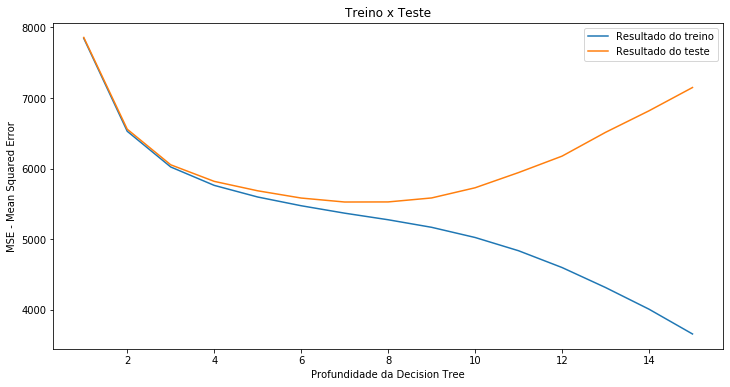

In [23]:
# Plotando o gráfico com os resultados de treino e teste, armazenados nos vetores train_results e test_results definidos anteriormente
#
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), train_results, range(1, 16), test_results)
plt.title('Treino x Teste')
plt.xlabel('Profundidade da Decision Tree')
plt.ylabel('MSE - Mean Squared Error')
plt.legend(['Resultado do treino','Resultado do teste'])

* Podemos observar claramente o comportamento de overfitting esperado da Aula 05: aumentando a profundidade da árvore, o erro de treinamento cai, mas o erro de teste aumenta significativamente. Isso signfica que o modelo entendeu tão bem os dados de teste, que ficou "viciado": não consegue lidar com os padrões encontrados nos dados de teste.